<strong><h1><em>IMAGE SEGMENTATION</em></h1>



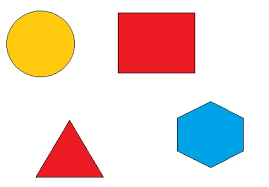

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
img=cv2.imread('shapes.png')
cv2_imshow(img)

<h3>1.Contours

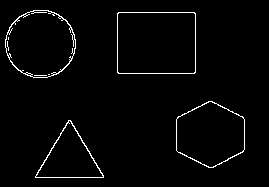

canny edges after conturing are 4


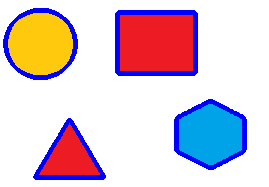

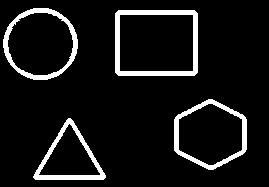

In [ ]:

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY )
edge=cv2.Canny(gray,30,200)

cv2_imshow(edge)

contours,hierarchy=cv2.findContours(edge.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)


print("canny edges after conturing are {}".format(str(len(contours))))

cv2.drawContours(img,contours,-1,(255,0,0),3)
cv2.drawContours(edge,contours,-1,(255,0,0),3)

cv2_imshow(img)
cv2_imshow(edge)



<h1><b>SORTING CONTOURS </h1>
<ul>
<li>SORTING BY AREA used in OBJECT RECOGNITION --> using contour area
<li> SORTING BY SPATIAL POSITION --> using contour centriod

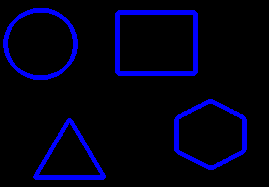

In [ ]:
blank=np.zeros((img.shape[0],img.shape[1],3))
cv2.drawContours(blank,contours,-1,(255,0,0),3)
cv2_imshow(blank)

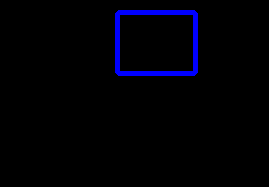

In [ ]:
#sorted based on area
sort_contours=sorted(contours,key=cv2.contourArea,reverse=True)

blank_n=np.zeros((img.shape[0],img.shape[1],3))
cv2.drawContours(blank_n,sort_contours[0],-1,(255,0,0),3)
cv2_imshow(blank_n)

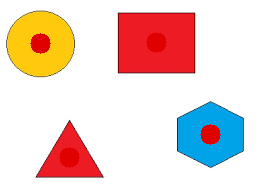

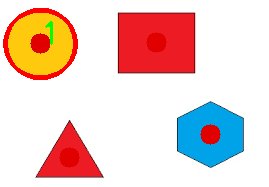

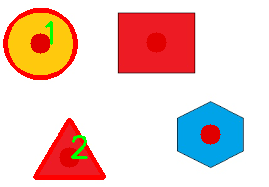

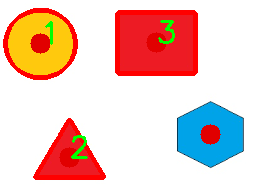

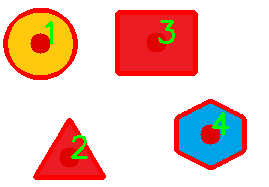

In [ ]:
imgn=cv2.imread('shapes.png')


def xcord(contours):
  if cv2.contourArea(contours)>10:
    M=cv2.moments(contours)
    return (int(M['m10']/M['m00']))


def label_contour_center(image,c):
  M=cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  cv2.circle(image ,(cx,cy),10,(0,0,225),-1)
  return image



for (i, c) in enumerate(contours): 
  orig =label_contour_center(imgn, c)

cv2_imshow(imgn)



contours_lr = sorted(contours,key = xcord, reverse=False)

for (i,c) in enumerate(contours_lr):


  cv2.drawContours (imgn, [c], -1, (0,0,255), 3)

  M = cv2.moments(c) 
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.putText(imgn, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

  cv2_imshow(imgn) 

  (x, y, w, h) = cv2.boundingRect(c)

  crop=imgn[y:y+h,x:x+w]
  img_name='test'+str(i+1)+'.png'
  cv2.imwrite(img_name,crop)



**APPROXIMATING CONTOURS AND CONVEX HULL**


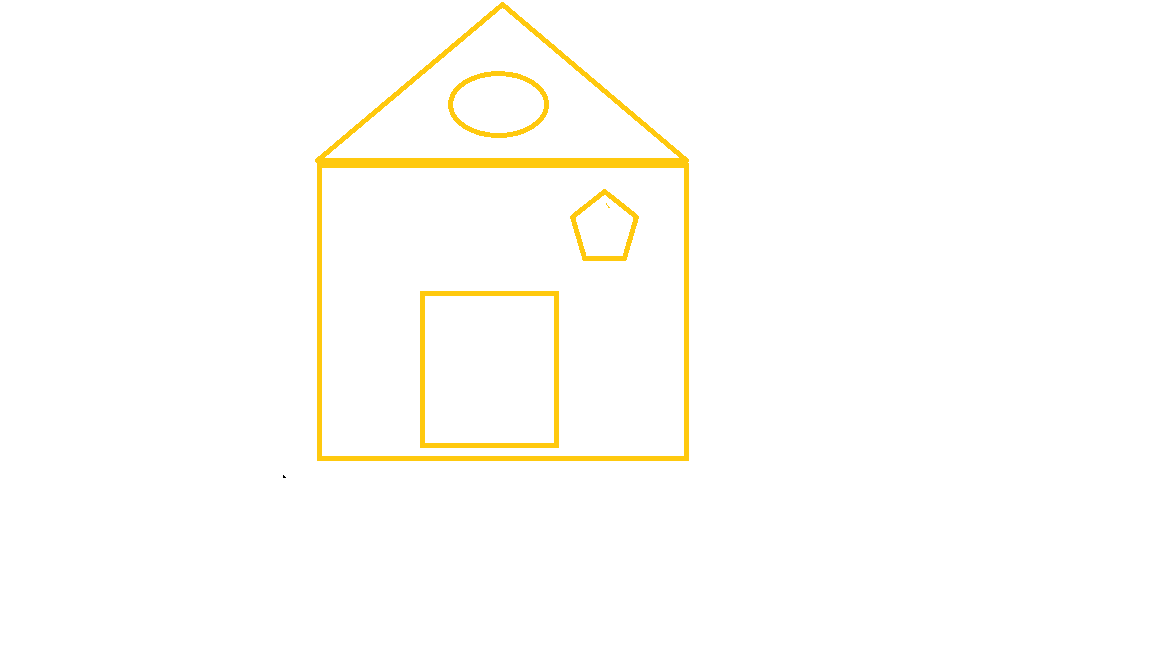

In [15]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

house=cv2.imread('house.png')
cv2_imshow(house)

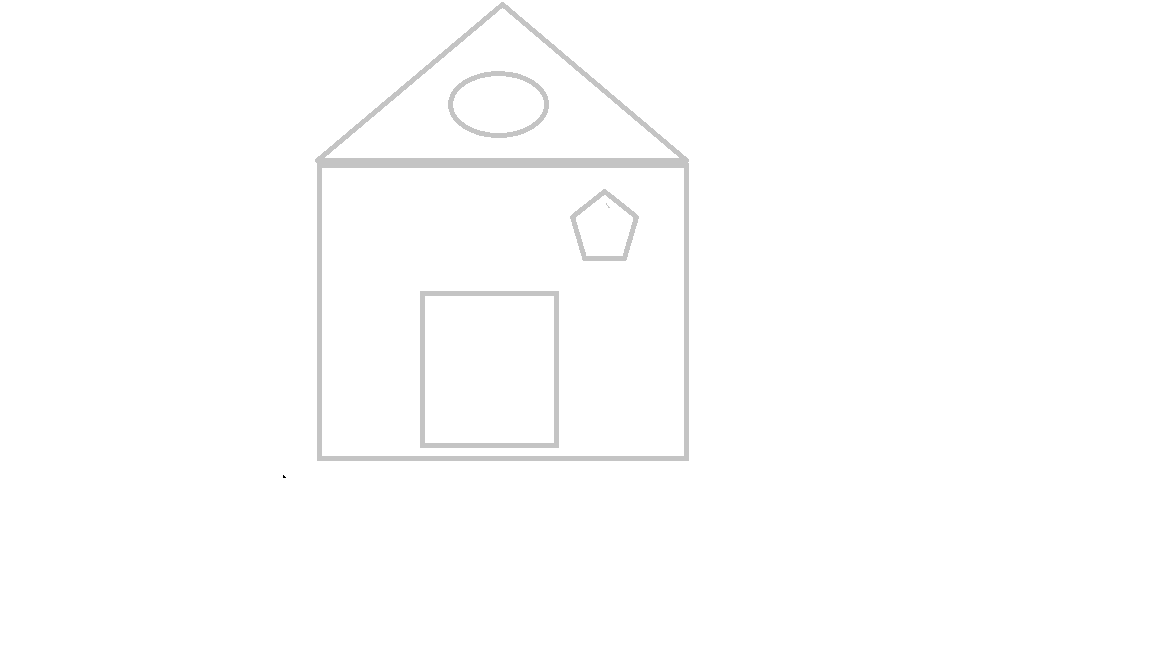

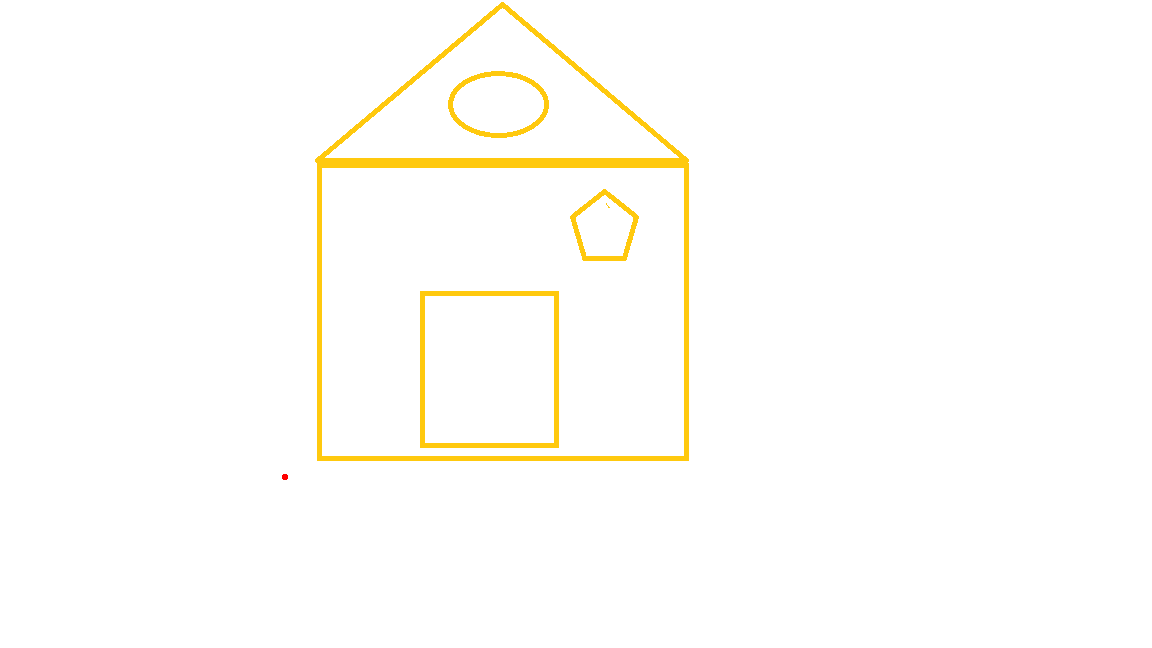

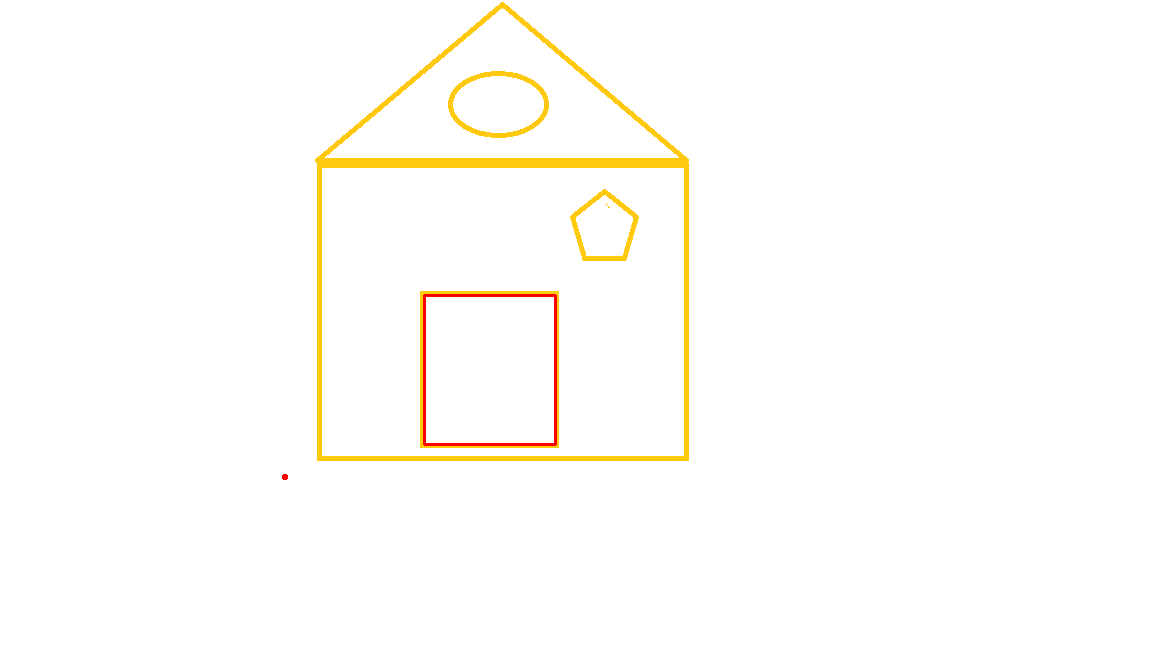

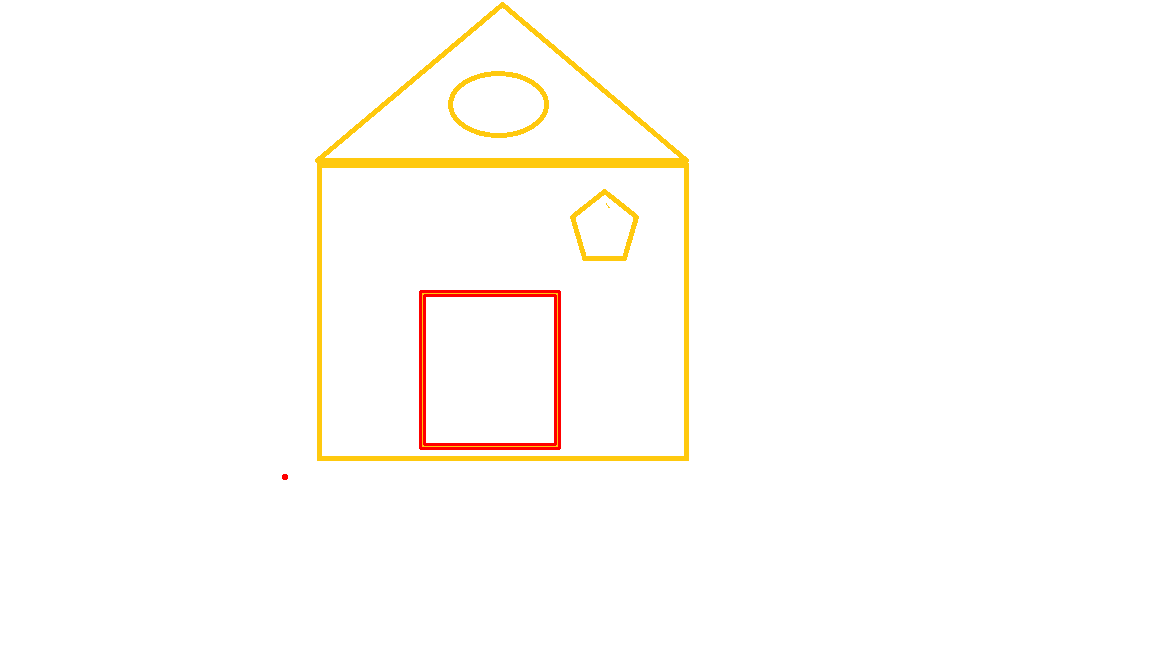

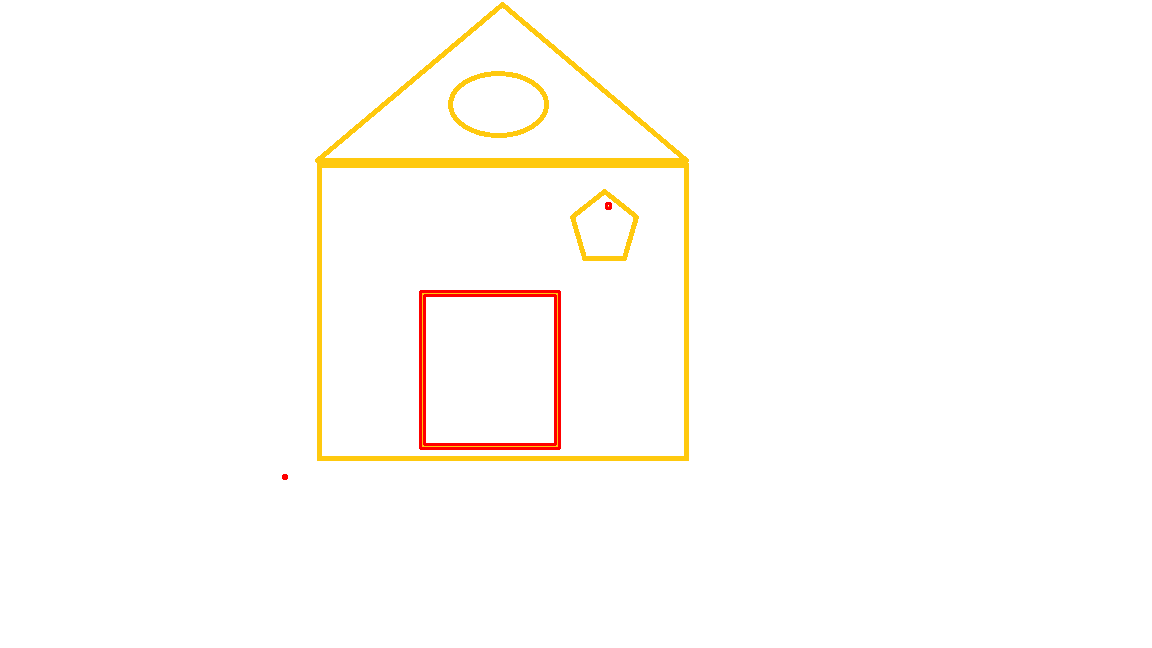

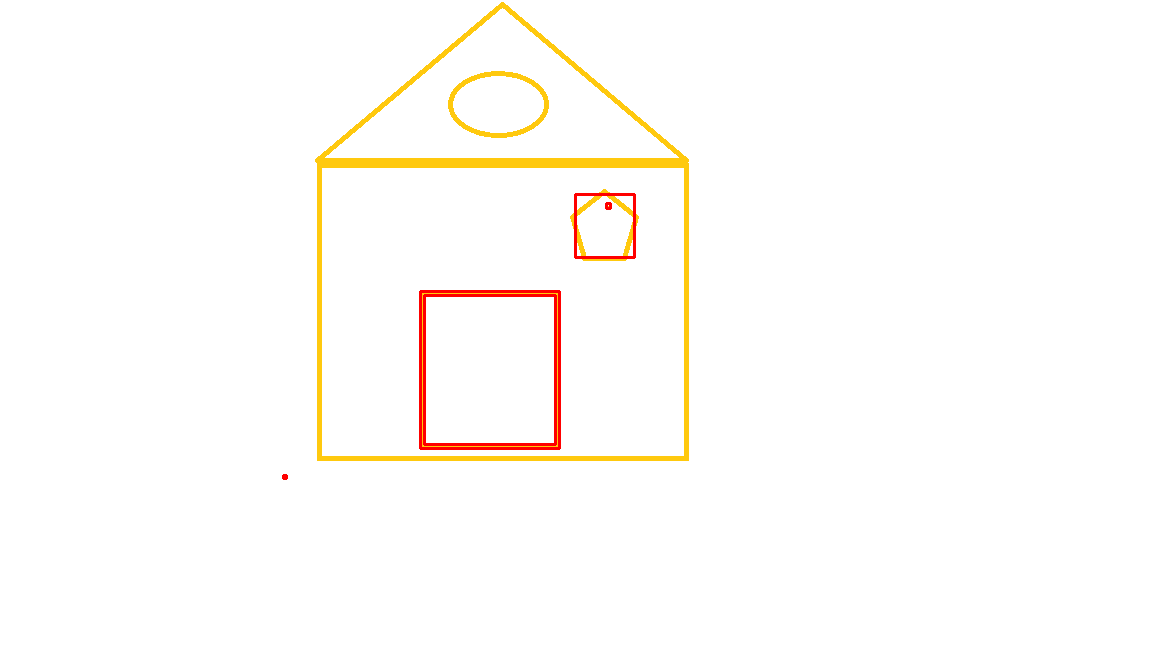

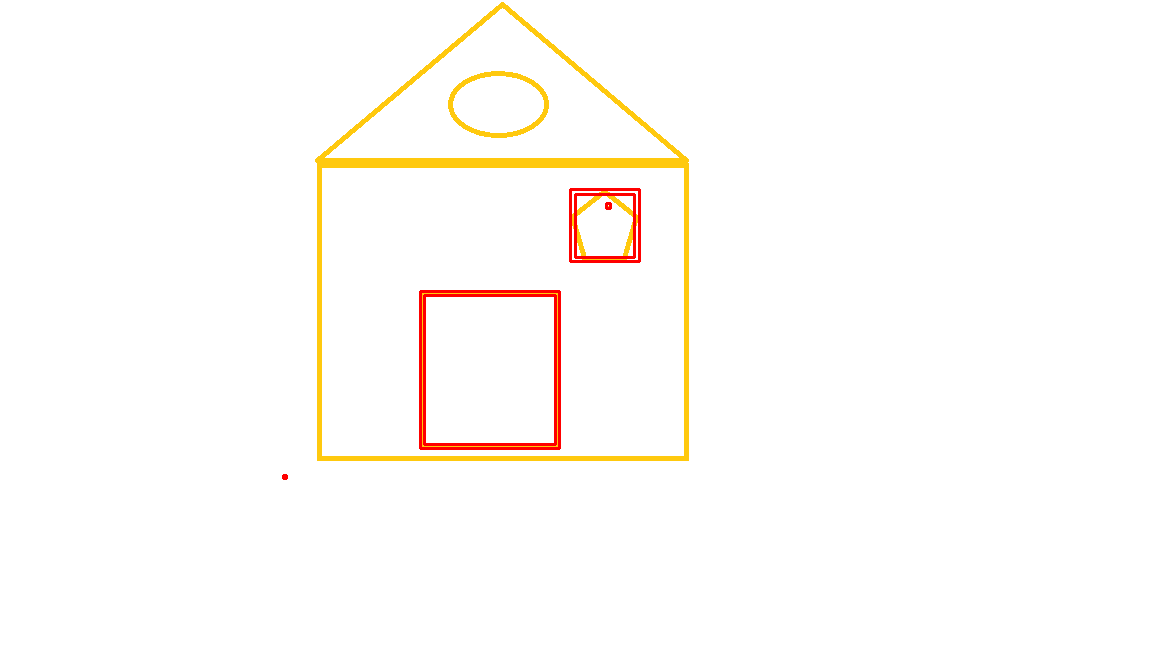

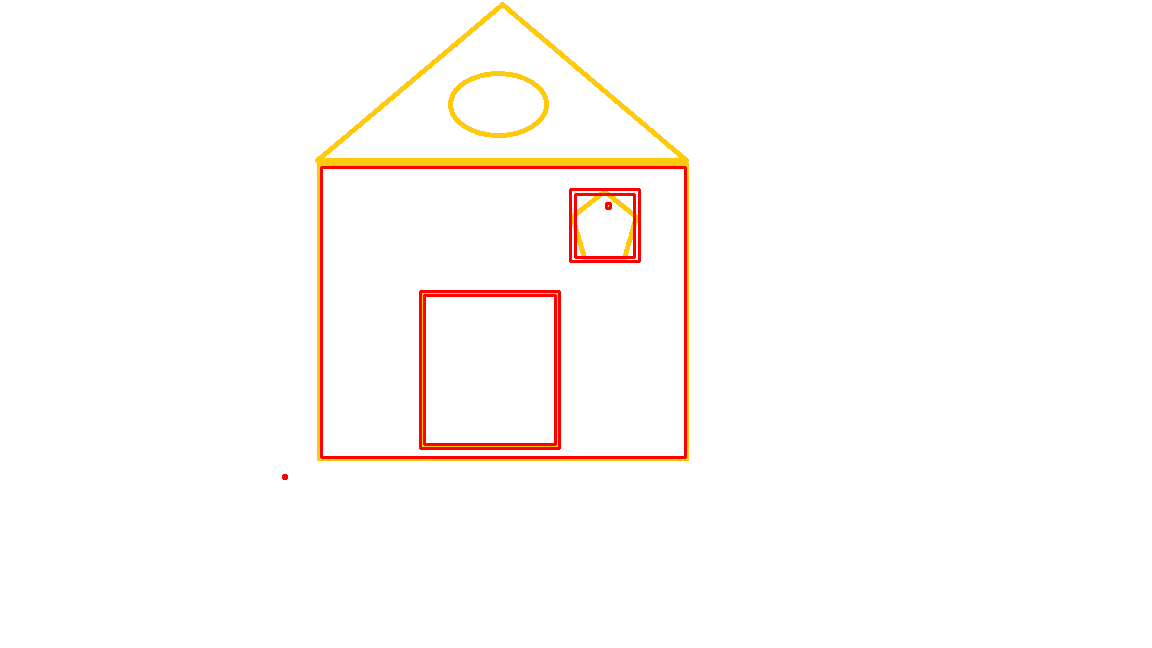

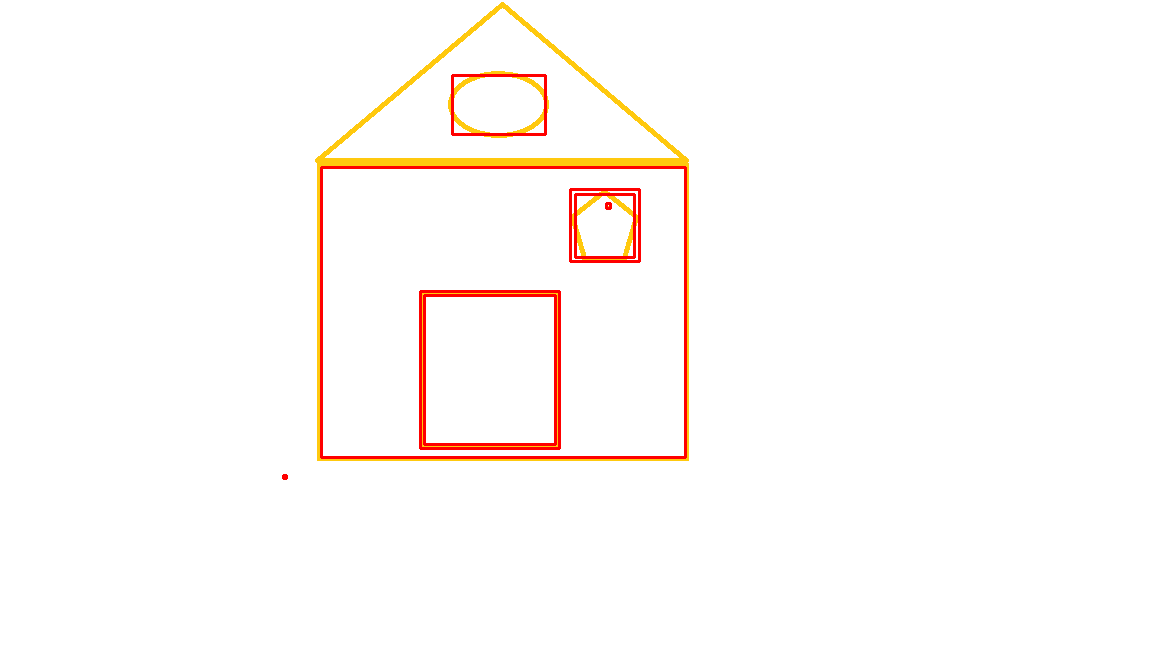

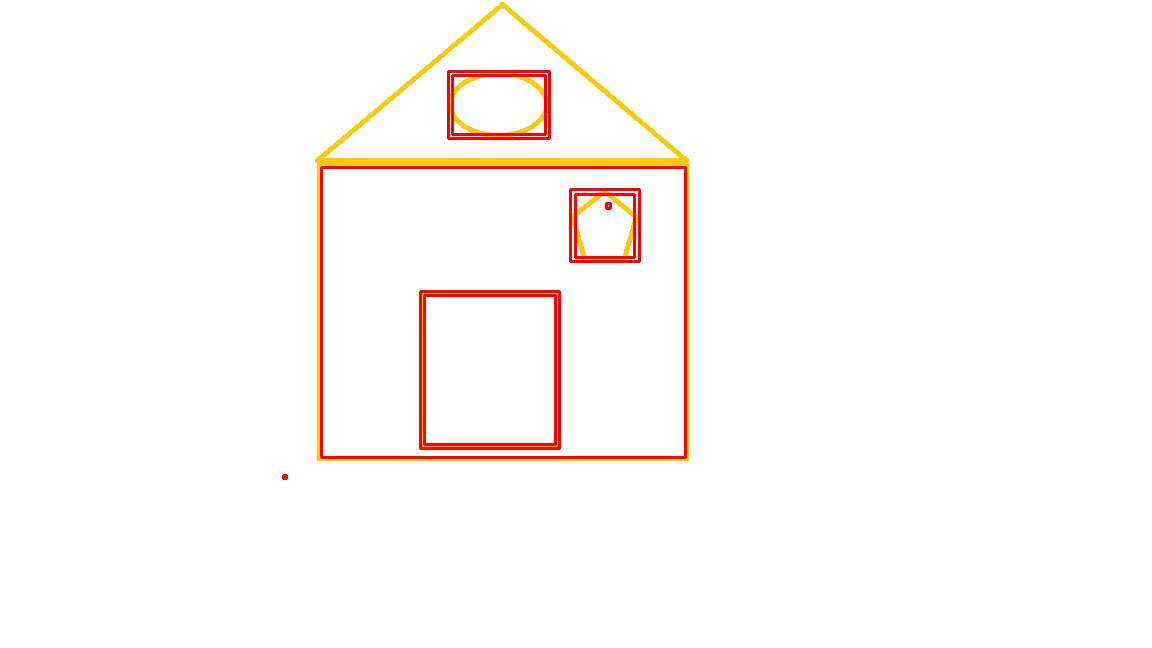

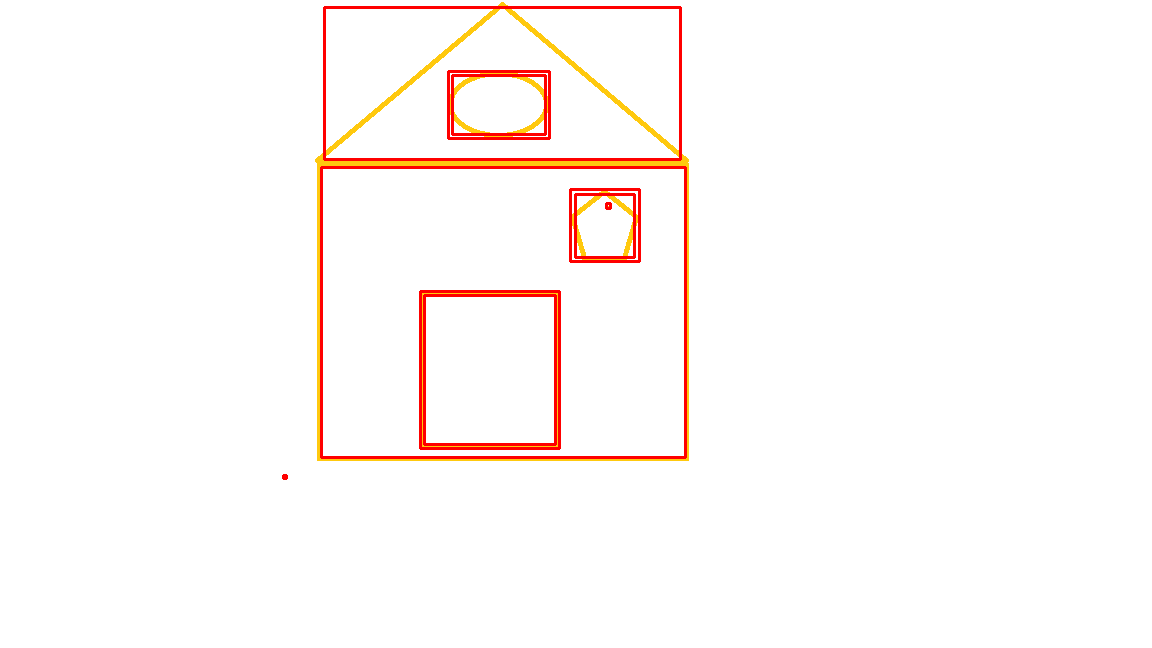

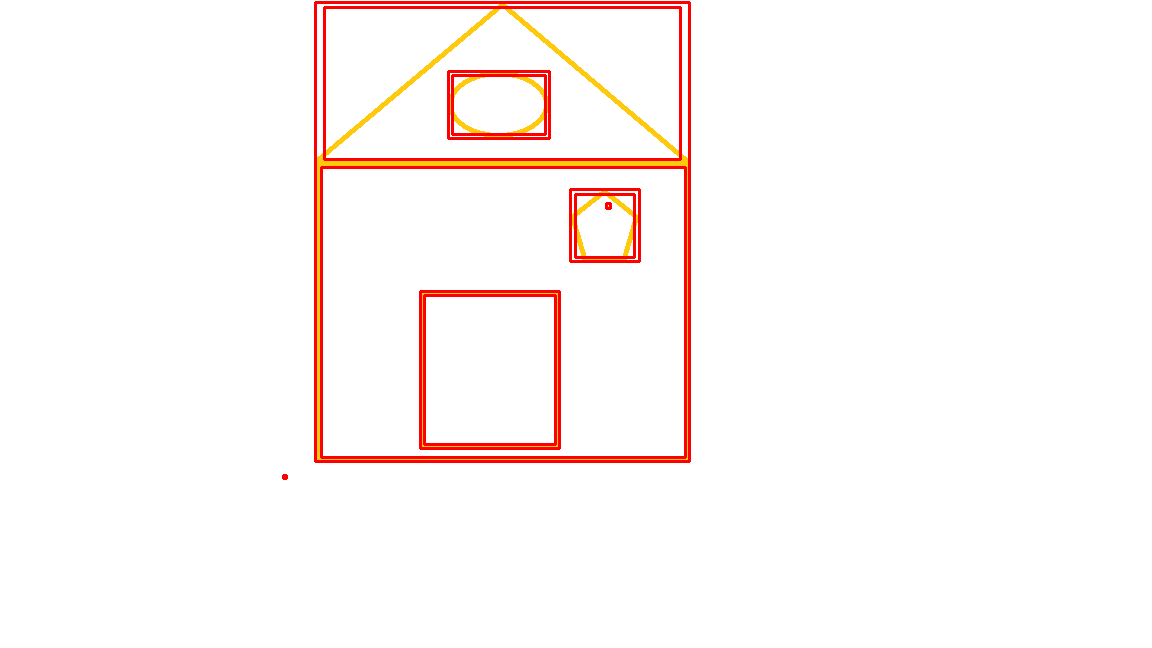

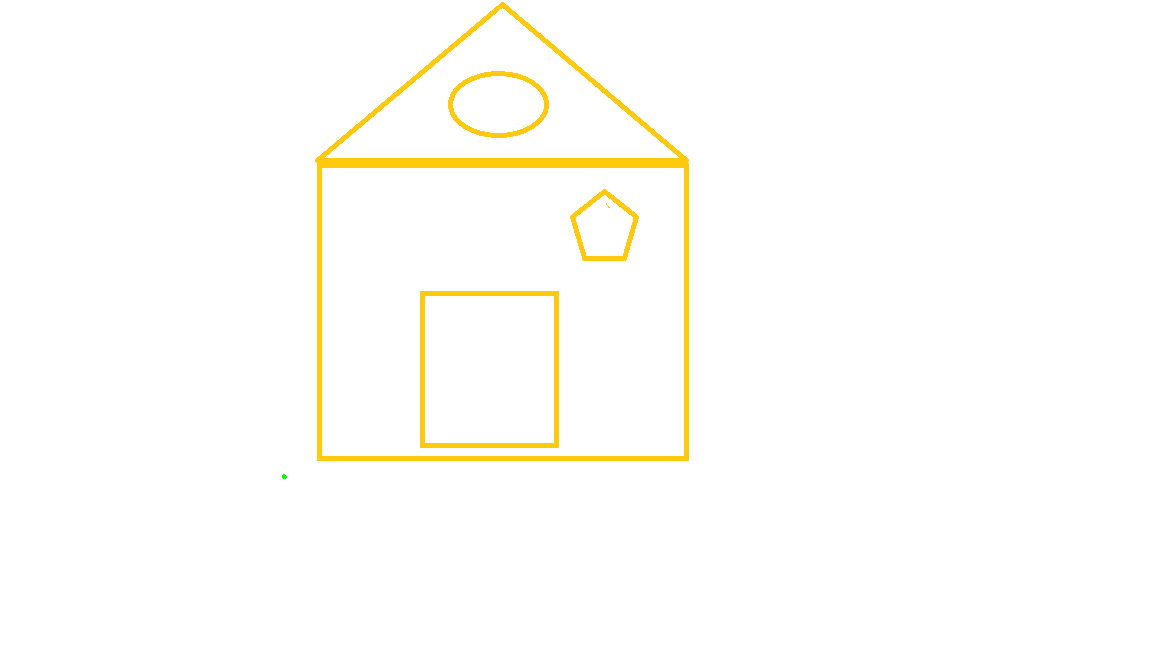

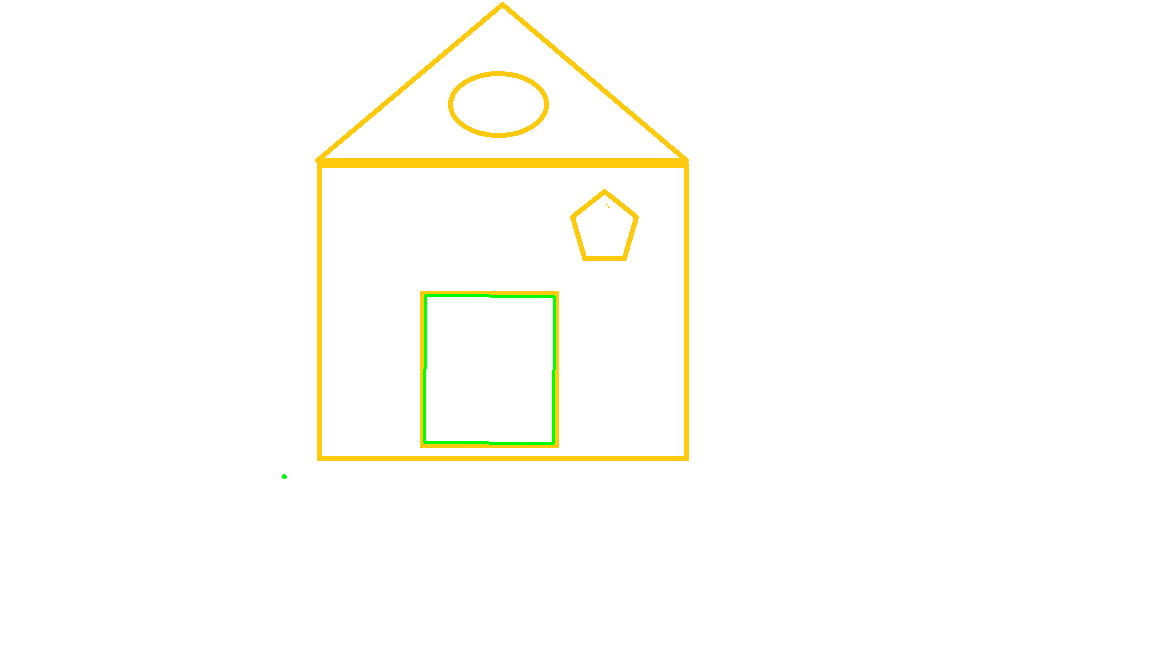

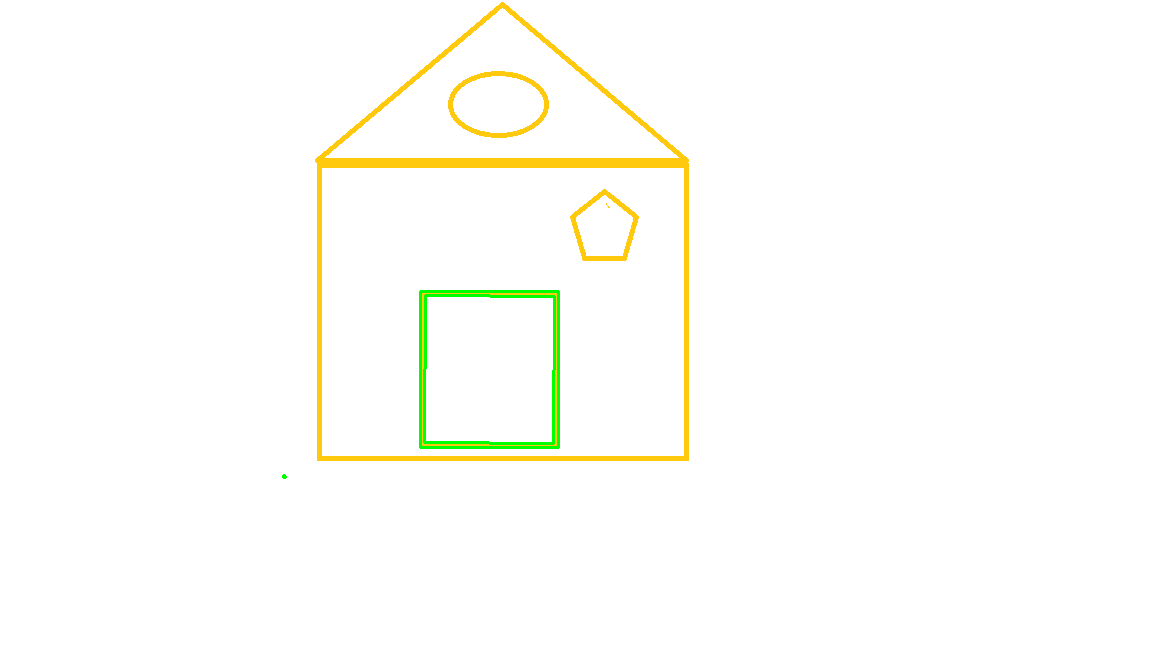

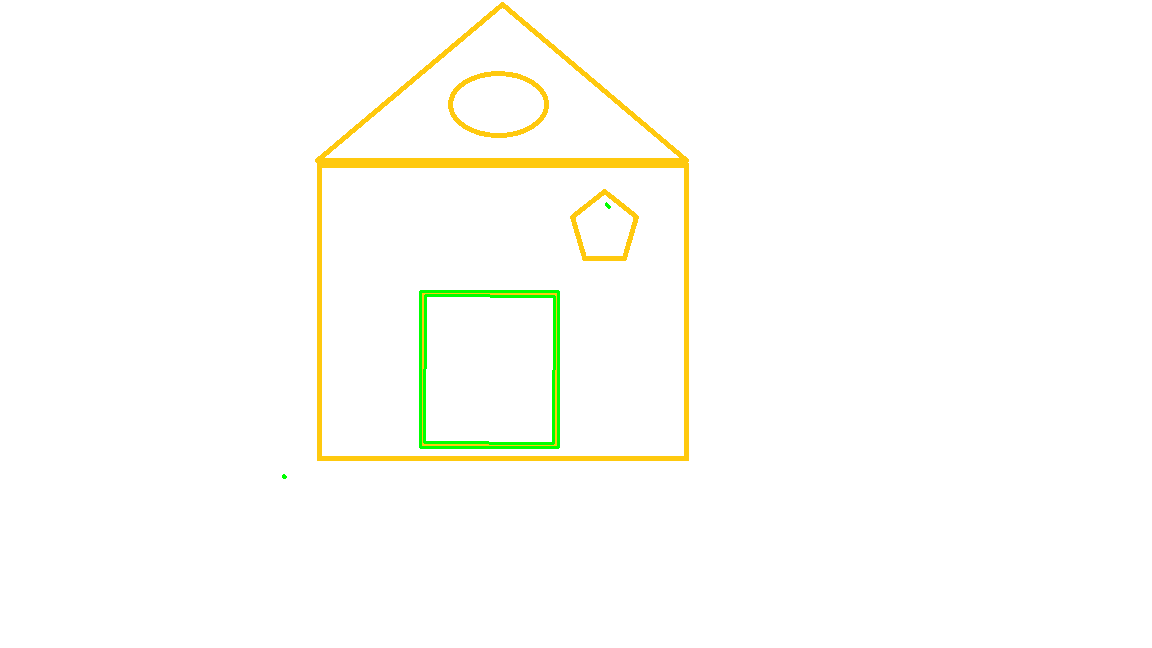

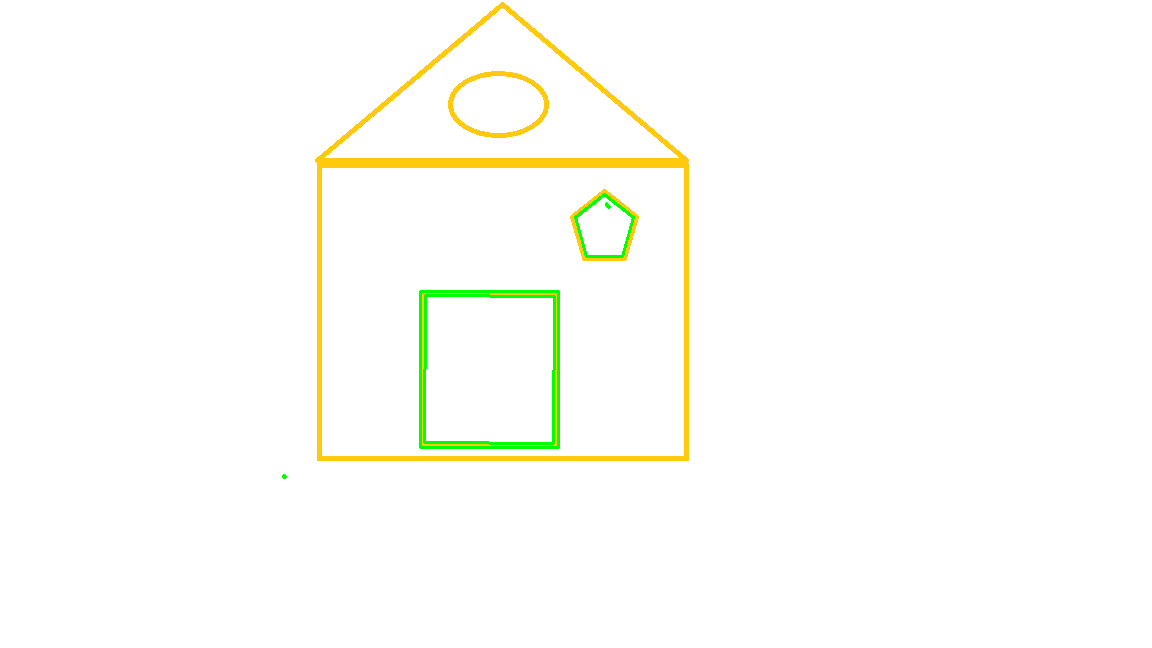

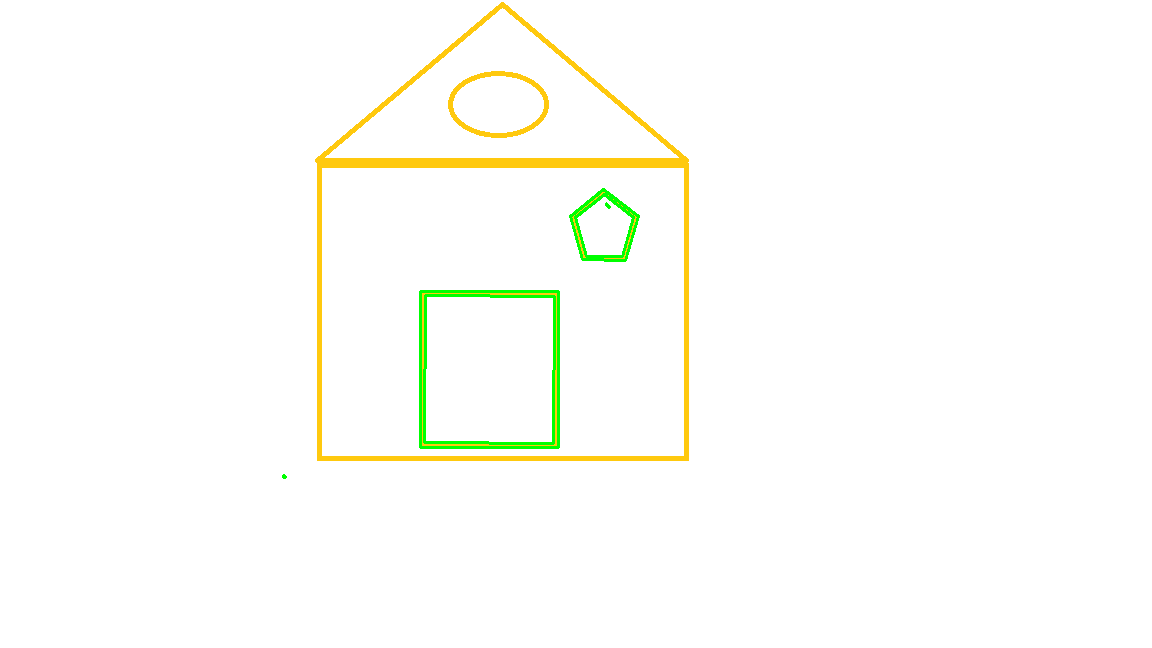

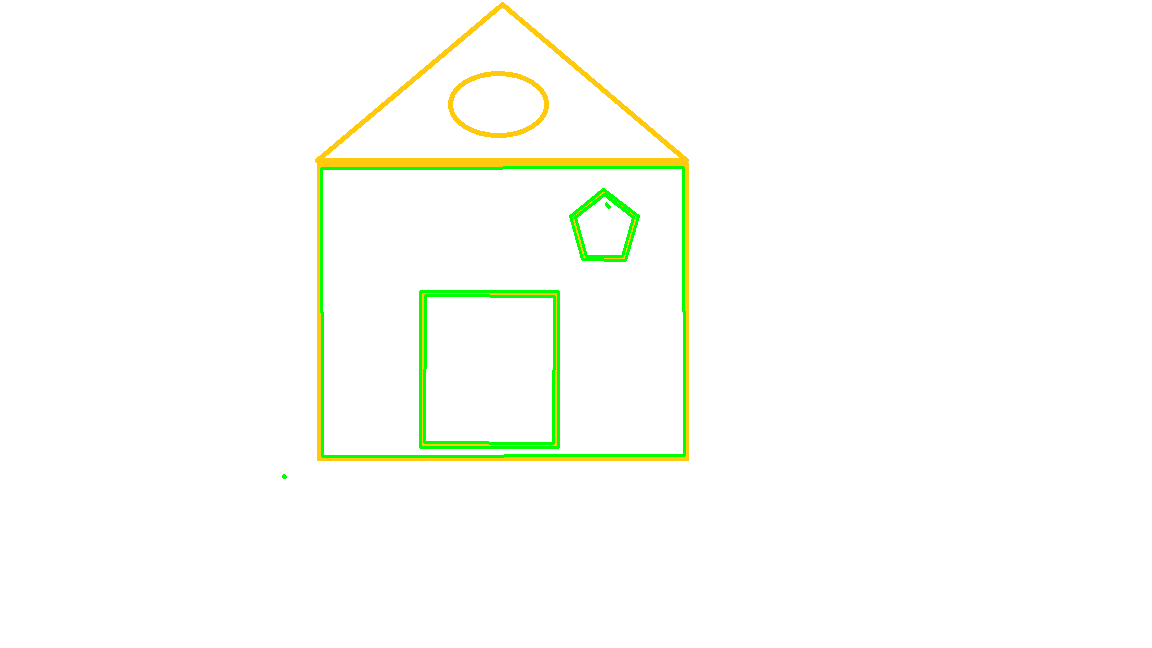

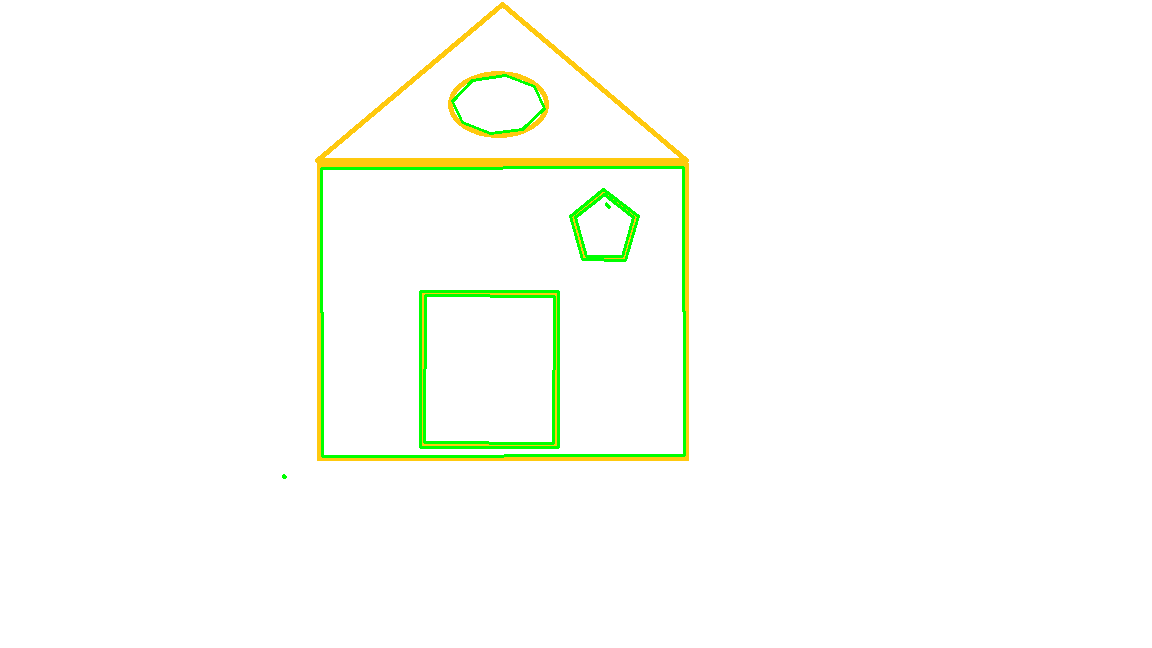

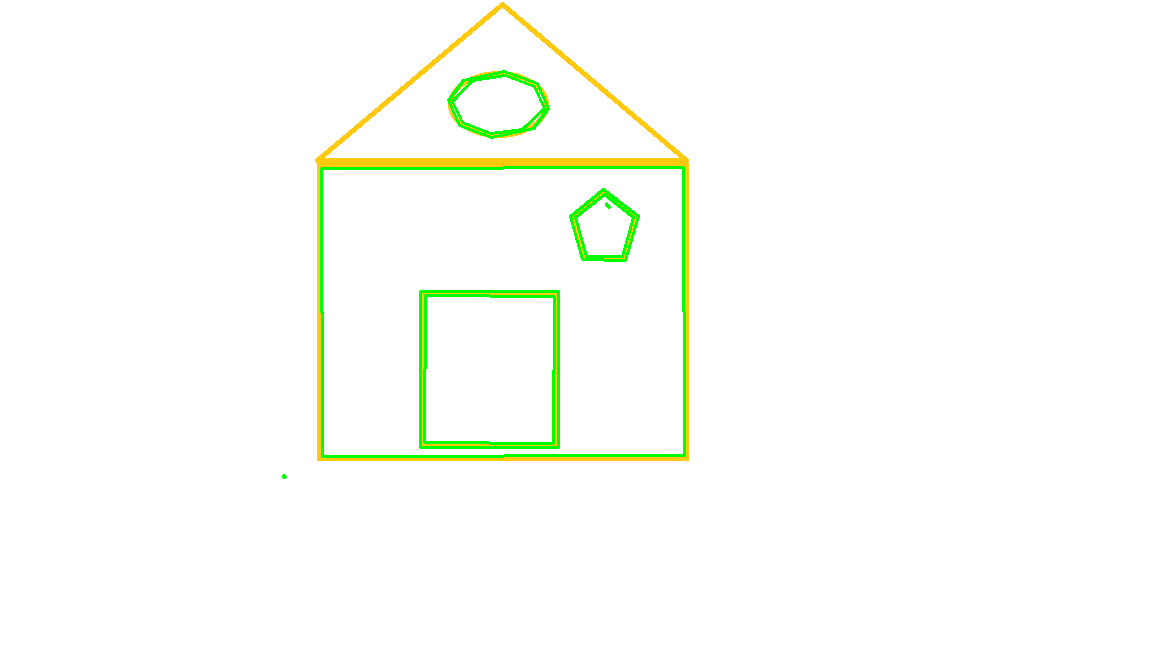

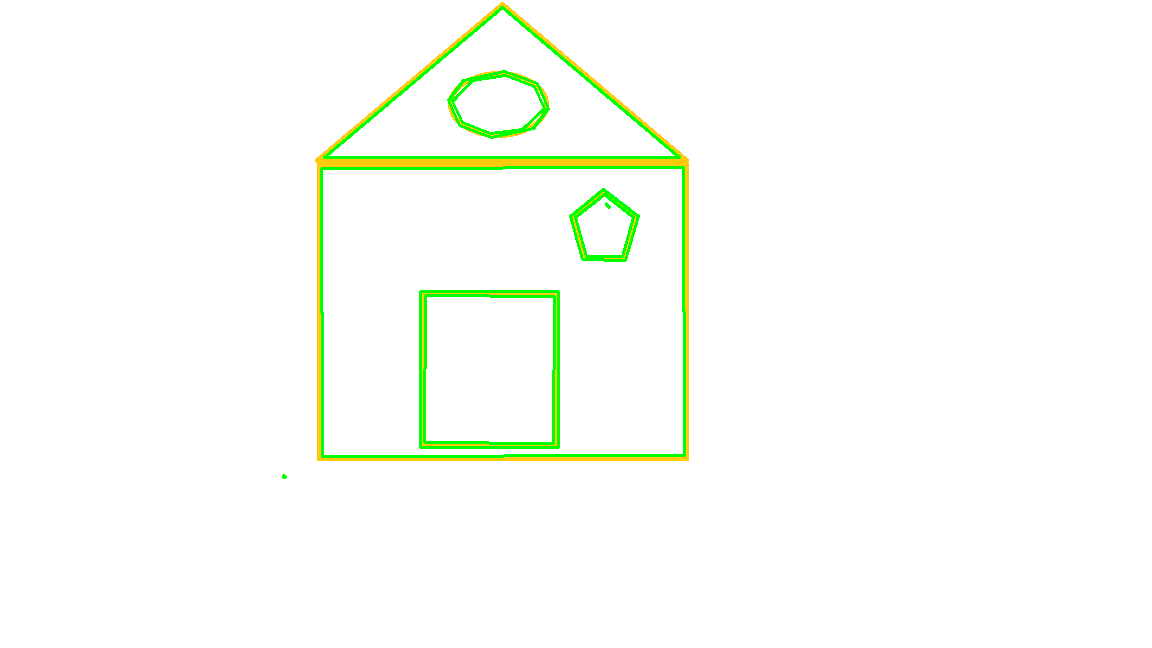

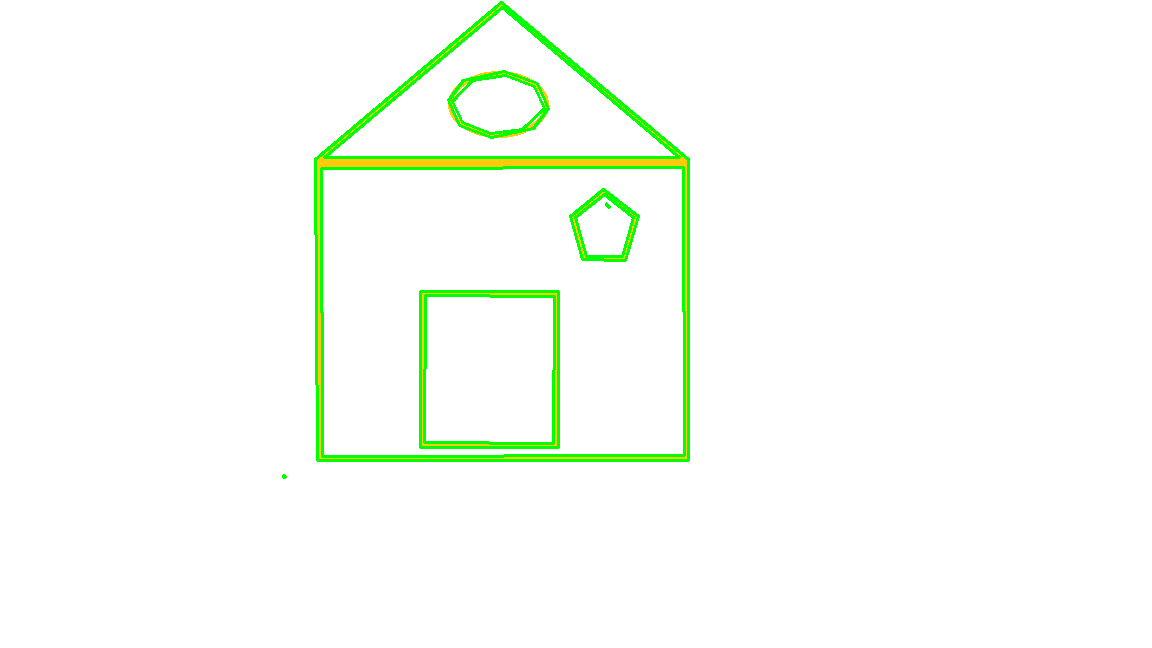

In [16]:
gray=cv2.cvtColor(house,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

ret,thresh=cv2.threshold(gray,200,225,cv2.THRESH_BINARY_INV)

contours,hier=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

temp = house.copy()

for c in contours:
  x,y,w,h=cv2.boundingRect(c)
  cv2.rectangle(temp,(x,y),(x+w,y+h),(0,0,255),2)
  cv2_imshow(temp)


for c in contours:
  acc=0.03*cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,acc,True)
  cv2.drawContours(house,[approx],0,(0,255,0),2)
  cv2_imshow(house)


